In [1]:
import numpy as np
from matplotlib import pyplot as plt, dates as mdates
import matplotlib.dates as mdates
import calendar
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
tweet2020 = pd.read_csv('tweets-2020-analiza.csv', low_memory=False)
tweet2020

,TweetID,Text,UserID,likeCount,lang,hastags,coordinates,place,date,time,CleanedText,Tokenize,POS_tagged,Lemma,Textblob_Polarity,Textblob_Analysis,Vader_Sentiment,Vader_Analysis,Afinn_Sentiment,Afinn_Analysis
0,1344795096810622976,i can’t believe just 8 more hours and no more corona virus. it’s been a crazy year #2021,1026350633035558912,12,en,NaN,NaN,NaN,2020-12-31,23:58,i can’t believe just more hours and no more corona virus it’s been a crazy year,"['i', 'can’t', 'believe', 'just', 'more', 'hours', 'and', 'no', 'more', 'corona', 'virus', 'it’s', 'been', 'a', 'crazy', 'year']","[('can’t', 'n'), ('believe', 'v'), ('hours', 'n'), ('corona', 'a'), ('virus', 'n'), ('it’s', 'n'), ('crazy', 'a'), ('year', 'n')]",can’t believe hour corona virus it’s crazy year,-0.600000,Negative,-0.3400,Negative,-2.0,Negative
1,1344794960407703553,"Nothing is new about the year joor, today's Friday, corona virus is still out there, bubu is still our president, people are still owing me money, fuel is still on the high prize and NEPA will soon take light...🤧\n#ExtraSpecial2021",867172406829383682,1,en,['ExtraSpecial2021'],NaN,NaN,2020-12-31,23:57,nothing is new about the year joor today's friday corona virus is still out there bubu is still our president people are still owing me money fuel is still on the high prize and nepa will soon take light extraspecial,"['nothing', 'is', 'new', 'about', 'the', 'year', 'joor', ""today's"", 'friday', 'corona', 'virus', 'is', 'still', 'out', 'there', 'bubu', 'is', 'still', 'our', 'president', 'people', 'are', 'still', 'owing', 'me', 'money', 'fuel', 'is', 'still', 'on', 'the', 'high', 'prize', 'and', 'nepa', 'will', 'soon', 'take', 'light', 'extraspecial']","[('nothing', 'n'), ('new', 'a'), ('year', 'n'), ('joor', 'n'), (""today's"", 'n'), ('friday', 'a'), ('corona', 'n'), ('virus', 'n'), ('still', 'r'), ('bubu', 'n'), ('still', 'r'), ('president', 'n'), ('people', 'n'), ('still', 'r'), ('owing', 'v'), ('money', 'n'), ('fuel', 'n'), ('still', 'r'), ('high', 'a'), ('prize', 'n'), ('nepa', 'n'), ('soon', 'r'), ('take', 'v'), ('light', 'a'), ('extraspecial', 'a')]",nothing new year joor today's friday corona virus still bubu still president people still owe money fuel still high prize nepa soon take light extraspecial,0.232121,Positive,0.5106,Positive,0.0,Neutral
2,1344794765833940992,Turned on ITV to see what they were putting on the telly for New Years. Fucking News at Ten about hospital problems and corona virus. They could have put on last years fireworks at least.,1301626062988812290,1,en,NaN,NaN,NaN,2020-12-31,23:57,turned on itv to see what they were putting on the telly for new years fucking news at ten about hospital problems and corona virus they could have put on last years fireworks at least,"['turned', 'on', 'itv', 'to', 'see', 'what', 'they', 'were', 'putting', 'on', 'the', 'telly', 'for', 'new', 'years', 'fucking', 'news', 'at', 'ten', 'about', 'hospital', 'problems', 'and', 'corona', 'virus', 'they', 'could', 'have', 'put', 'on', 'last', 'years', 'fireworks', 'at', 'least']","[('turned', 'v'), ('itv', 'n'), ('see', 'v'), ('putting', 'v'), ('telly', 'r'), ('new', 'a'), ('years', 'n'), ('fucking', 'v'), ('news', 'n'), ('ten', 'n'), ('hospital', 'n'), ('problems', 'n'), ('corona', 'n'), ('virus', 'v'), ('could', None), ('put', 'v'), ('last', 'a'), ('years', 'n'), ('fireworks', 'r'), ('least', 'a')]",turn itv see put telly new year fuck news ten hospital problem corona virus could put last year fireworks least,-0.112727,Negative,-0.7351,Negative,-6.0,Negative
3,1344794654663974912,115 new cases and 2 new deaths in Niger \n\n[23:56 GMT] #coronavirus #CoronaVirusUpdate #COVID19 #CoronavirusPandemic,1236273574895329281,0,en,"['coronavirus', 'CoronaVirusUpdate', 'COVID19', 'CoronavirusPandemic']",NaN,NaN,2020-12-31,23:56,new cases and new deaths in niger gmt coronavirus coronavirusupdate covid coronaviruspandemic,"['new', 'cases', 'and', 'new', 'deaths', 'in', 'niger', 'gmt', 'coronavirus', 'coronavirusupdat

In [3]:
tweet2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465116 entries, 0 to 2465115
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TweetID            object 
 1   Text               object 
 2   UserID             object 
 3   likeCount          object 
 4   lang               object 
 5   hastags            object 
 6   coordinates        object 
 7   place              object 
 8   date               object 
 9   time               object 
 10  CleanedText        object 
 11  Tokenize           object 
 12  POS_tagged         object 
 13  Lemma              object 
 14  Textblob_Polarity  float64
 15  Textblob_Analysis  object 
 16  Vader_Sentiment    float64
 17  Vader_Analysis     object 
 18  Afinn_Sentiment    float64
 19  Afinn_Analysis     object 
dtypes: float64(3), object(17)
memory usage: 376.1+ MB


In [4]:
tweet2020.drop(345328, axis=0, inplace=True) 

In [12]:
tweet2020['date'] =  pd.to_datetime(tweet2020['date'])

In [13]:
#ilość tweetów w poszczególnych dniach
tweet_per_day = tweet2020['date'].value_counts().sort_index()

In [14]:
sma10_tweet_per_day = tweet_per_day.rolling(window=10).mean() #średnia krocząca z 10 dni
sma10_tweet_per_day

2019-12-15       NaN
2019-12-19       NaN
2019-12-23       NaN
2019-12-29       NaN
2019-12-30       NaN
               ...  
2020-12-27    5076.2
2020-12-28    5060.9
2020-12-29    5032.8
2020-12-30    5103.3
2020-12-31    4856.0
Name: date, Length: 360, dtype: float64

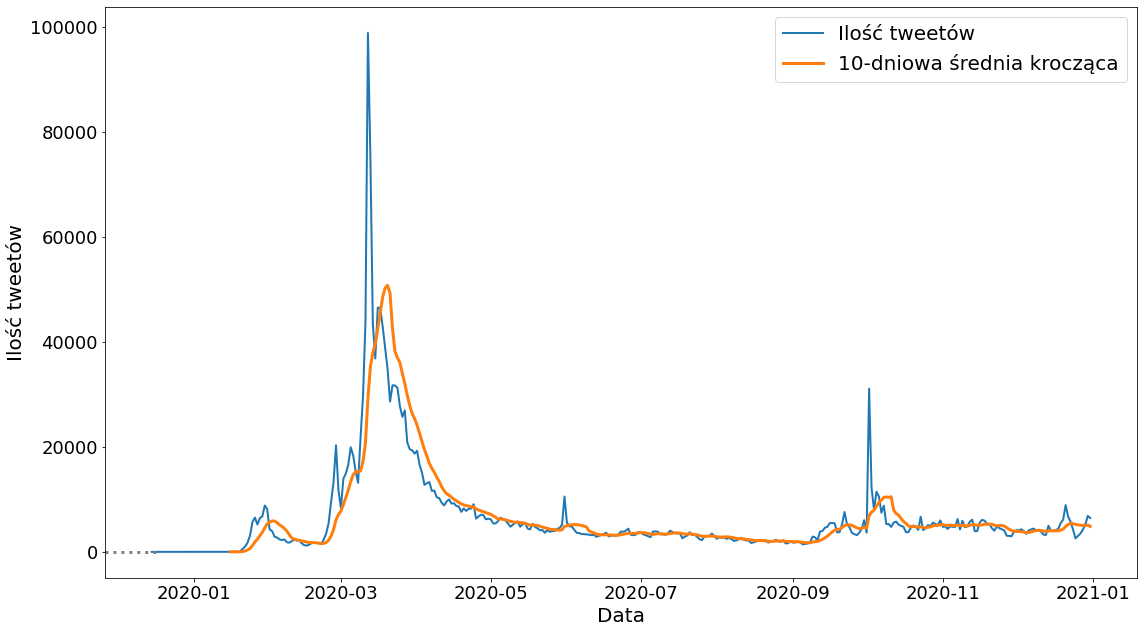

In [34]:
plt.figure(figsize = (18.5, 10.5)) # wielość wykresu

plt.plot(tweet_per_day, label='Ilość tweetów', linewidth = 2) 
plt.plot(sma10_tweet_per_day, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3

ax = plt.gca() #
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=20) #nazwanie osi x
plt.ylabel('Ilość tweetów', fontsize=20) #nazwanie osi y
plt.legend(prop={'size':20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=0, xmax=0.05, linewidth= 3,  linestyle='dotted', color='gray')

plt.savefig("ilosc_tweetow_2020.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

## AFINN 

In [18]:
#średni wydzwięk uzyskany z Afinn
grouped_mean_Afinn = tweet2020.groupby('date')['Afinn_Sentiment'].mean()

In [19]:
sma10_Afinn = grouped_mean_Afinn.rolling(window=10).mean() #średnia krocząca z 10 dni
sma10_Afinn

date
2019-12-15         NaN
2019-12-19         NaN
2019-12-23         NaN
2019-12-29         NaN
2019-12-30         NaN
                ...   
2020-12-27   -1.043862
2020-12-28   -1.051204
2020-12-29   -1.030385
2020-12-30   -1.031240
2020-12-31   -0.969331
Name: Afinn_Sentiment, Length: 360, dtype: float64

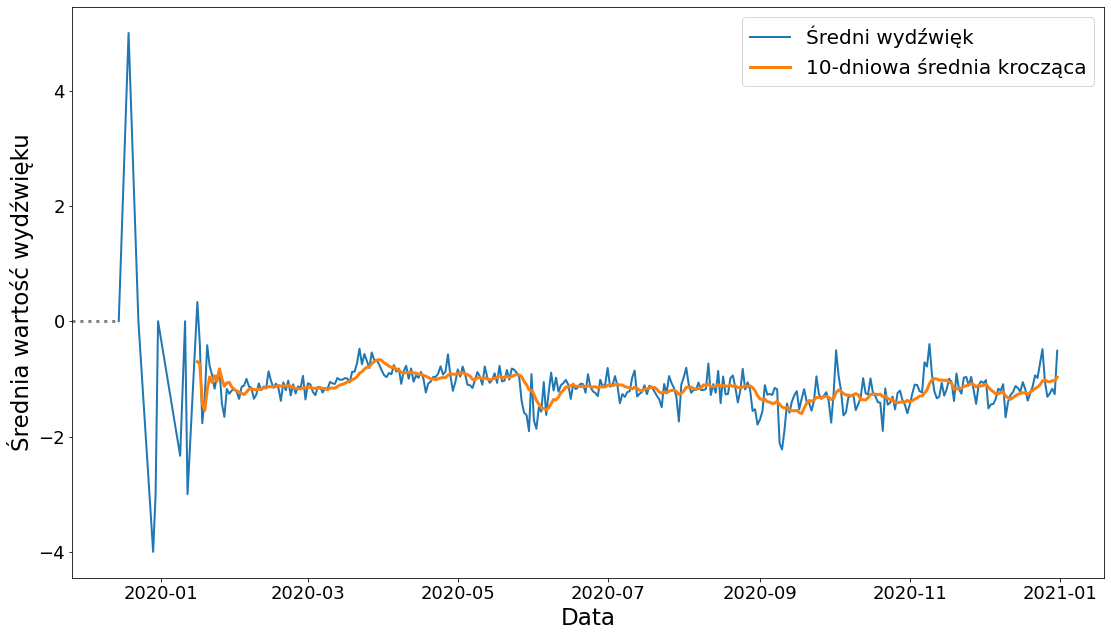

In [27]:
plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(grouped_mean_Afinn, label='Średni wydźwięk', linewidth = 2) 
plt.plot(sma10_Afinn, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3

ax = plt.gca() #
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=23) #nazwanie osi x
plt.ylabel('Średnia wartość wydźwięku', fontsize=23) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=0, xmax=0.045, linewidth= 3, linestyle='dotted', color='gray')
plt.savefig("AFINN_2020.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

## TextBlob

In [28]:
#średni wydzwięk uzyskany z Textblob
grouped_mean_Textblob = tweet2020.groupby('date')['Textblob_Polarity'].mean()

In [29]:
sma10_Textblob = grouped_mean_Textblob.rolling(window=10).mean() #średnia krocząca z 10 dni
sma10_Textblob

date
2019-12-15         NaN
2019-12-19         NaN
2019-12-23         NaN
2019-12-29         NaN
2019-12-30         NaN
                ...   
2020-12-27    0.037294
2020-12-28    0.037073
2020-12-29    0.037531
2020-12-30    0.037089
2020-12-31    0.038838
Name: Textblob_Polarity, Length: 360, dtype: float64

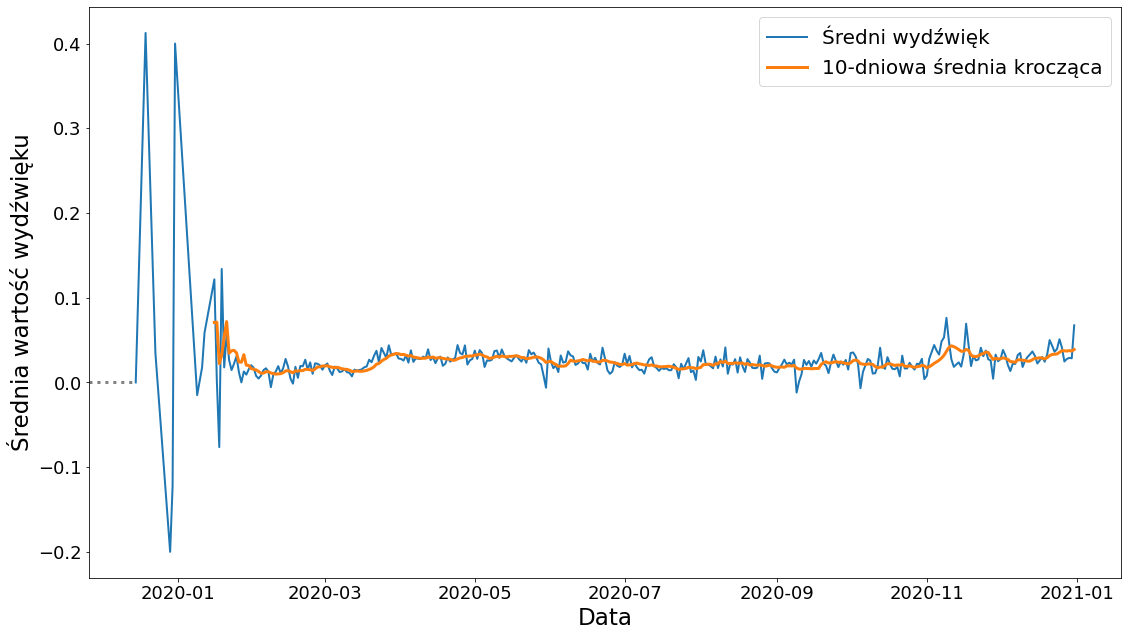

In [30]:
plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(grouped_mean_Textblob, label='Średni wydźwięk', linewidth = 2)
plt.plot(sma10_Textblob, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=23) #nazwanie osi x
plt.ylabel('Średnia wartość wydźwięku', fontsize=23) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=0, xmax=0.045, linestyle='dotted', linewidth= 3, color='gray')
plt.savefig("TextBlob_2020.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

## VADER

In [31]:
#średni wydzwięk uzyskany z VADER
grouped_mean_Vader = tweet2020.groupby('date')['Vader_Sentiment'].mean()

In [32]:
sma10_Vader = grouped_mean_Vader.rolling(window=10).mean() #średnia krocząca z 10 dni
sma10_Vader

date
2019-12-15         NaN
2019-12-19         NaN
2019-12-23         NaN
2019-12-29         NaN
2019-12-30         NaN
                ...   
2020-12-27   -0.076024
2020-12-28   -0.076849
2020-12-29   -0.076623
2020-12-30   -0.076039
2020-12-31   -0.069288
Name: Vader_Sentiment, Length: 360, dtype: float64

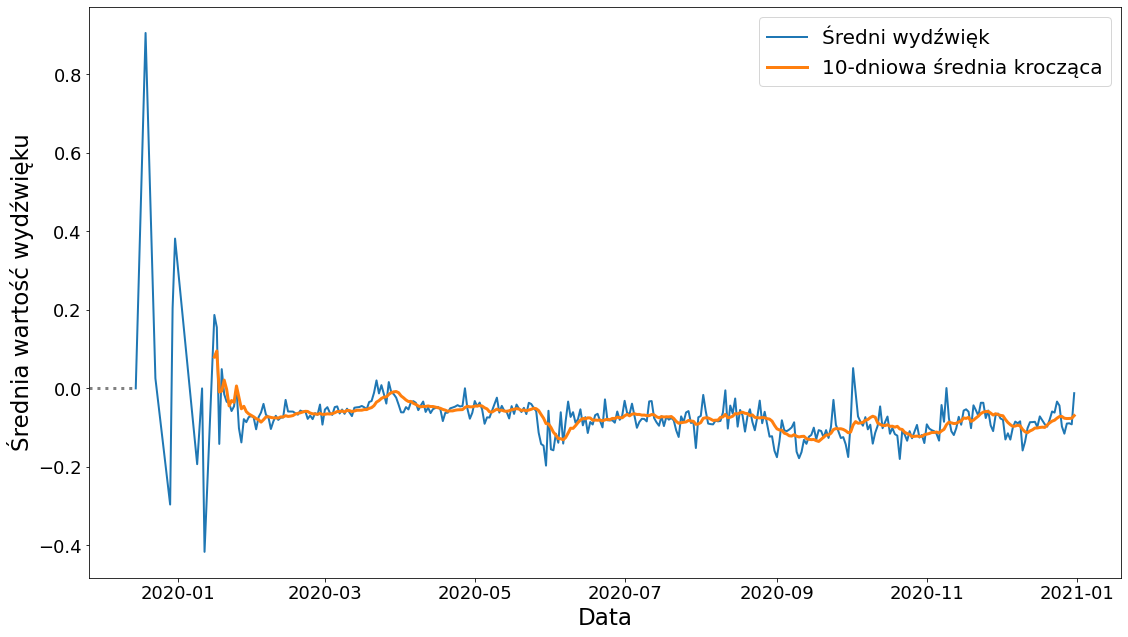

In [33]:
plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(grouped_mean_Vader, label='Średni wydźwięk', linewidth = 2) 
plt.plot(sma10_Vader, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3

ax = plt.gca() #
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=23) #nazwanie osi x
plt.ylabel('Średnia wartość wydźwięku', fontsize=23) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=0, xmax=0.045, linewidth= 3, linestyle='dotted', color='gray')
plt.savefig("VADER_2020.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

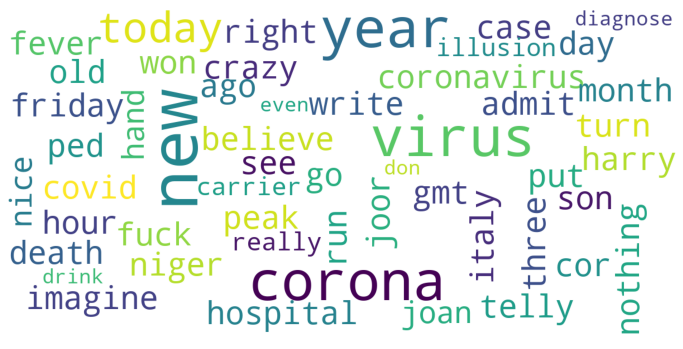

In [58]:
#stworzenie własnych stopwords, które nie będą uwzględniane w wizualizacji
customStopwords=list(STOPWORDS)+ ['dtype', 'c', 'la', 't', 'file', 've', 'te', 'itv', 'object', 'yr', 'y', 'yro', 'pre', 'cra', 'yay', 'btc', 'dr', 'Lemma', 'gu', 'na', 'per', 'oh', 's', 'daniel', 'length', 'name']

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        collocations=False, # nie uwzględnia kolokacji (bigramy) dwóch słów
        background_color='white', #kolor tła
        stopwords=customStopwords, #słowa które nie będą brane pod uwagę
        max_words=300, # mksymalna liczba słów
        max_font_size=40,  #rozmiar czcionki
        scale=3 #skalowanie między obliczeniami a rysowaniem
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.savefig("chmura_2020.pdf", dpi=300, bbox_inches='tight')
    plt.show()

show_wordcloud(tweet2020['Lemma'])

## Lockdown

In [28]:
#ilość tweetów dla każdego użytkownika
data['UserID'].value_counts()

1303827375420039168    2528
59845543               2024
1256895281502629892    1216
1279502964311261184    1210
42896611               1173
                       ... 
1340360335274991618       1
1258767960551940096       1
1165206254                1
778712778886385665        1
45586617                  1
Name: UserID, Length: 383241, dtype: int64

In [56]:
#wybór użytkownika który najwięcej tweetował
firstUser = data[data.UserID == 1303827375420039168]

In [57]:
firstUser

,TweetID,Text,UserID,likeCount,lang,hastags,coordinates,place,date,time,CleanedText,Tokenize,POS_tagged,Lemma,Textblob_Polarity,Textblob_Analysis,Vader_Sentiment,Vader_Analysis,Afinn_Sentiment,Afinn_Analysis
126725,1409494753654284291,"COVID-Topia: Blessings, Tyranny, and Smiling a...",1303827375420039168,0,en,"['COVID', 'COVIDBook']",NaN,NaN,2021-06-28,12:51,covid topia blessings tyranny and smiling at p...,"['covid', 'topia', 'blessings', 'tyranny', 'an...","[('covid', 'n'), ('topia', 'n'), ('blessings',...",covid topia blessing tyranny smile people te...,0.166667,Positive,0.6908,Positive,5.0,Positive
126801,1409464556188061696,"COVID-Mania: Faith, Pessimism, and Inescapable...",1303827375420039168,0,en,"['COVID', 'COVIDBook']",NaN,NaN,2021-06-28,10:51,covid mania faith pessimism and inescapable ch...,"['covid', 'mania', 'faith', 'pessimism', 'and'...","[('covid', 'n'), ('mania', 'n'), ('faith', 'n'...",covid mania faith pessimism inescapable chil...,0.000000,Neutral,0.0772,Positive,-1.0,Negative
127025,1409373962140749827,"COVID-spiracy Freedom, Ennui, and Being Worse ...",1303827375420039168,0,en,"['COVID', 'COVIDBook']",NaN,NaN,2021-06-28,04:51,covid spiracy freedom ennui and being worse th...,"['covid', 'spiracy', 'freedom', 'ennui', 'and'...","[('covid', 'n'), ('spiracy', 'n'), ('freedom',...",covid spiracy freedom ennui bad italy inside...,-0.700000,Negative,-0.1280,Negative,-3.0,Negative
127048,1409343760761294851,"Love in the Time of Covid: Trust, Boredom, and...",1303827375420039168,0,en,"['COVID', 'COVIDBook']",NaN,NaN,2021-06-28,02:51,love in the time of covid trust boredom and so...,"['love', 'in', 'the', 'time', 'of', 'covid', '...","[('love', 'n'), ('time', 'n'), ('covid', 'a'),...",love time covid trust boredom much toilet pa...,0.233333,Positive,0.7351,Positive,4.0,Positive
127086,1409313560669401088,"The City of COVID: Sex, Death, and No Longer F...",1303827375420039168,0,en,"['COVID', 'COVIDBook']",NaN,NaN,2021-06-28,00:51,the city of covid sex death and no longer feel...,"['the', 'city', 'of', 'covid', 'sex', 'death',...","[('city', 'n'), ('covid', 'a'), ('sex', 'n'), ...",city covid sex death longer feel awkward tee...,-0.600000,Negative,-0.0772,Negative,-4.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409146,1317448248232214528,"COVID Town: Friendship, Pain, &amp; Watching I...",1303827375420039168,0,en,"['COVID', 'COVIDBook']",NaN,NaN,2020-10-17,12:51,covid town friendship pain amp watching it all...,"['covid', 'town', 'friendship', 'pain', 'amp',...","[('covid', 'a'), ('town', 'n'), ('friendship',...",covid town friendship pain amp watch burn in...,0.000000,Neutral,-0.1027,Negative,0.0,Neutral
409199,1317418037797072896,"COVIDLandia: Acceptance, Boredom, &amp; Expres...",1303827375420039168,0,en,"['COVID', 'COVIDBook']",NaN,NaN,2020-10-17,10:51,covidlandia acceptance boredom amp expressing ...,"['covidlandia', 'acceptance', 'boredom', 'amp'...","[('covidlandia', 'n'), ('acceptance', 'n'), ('...",covidlandia acceptance boredom amp express m...,-0.600000,Negative,0.1779,Positive,1.0,Positive
409321,1317327442789437442,"The COVIDing: Freedom, Lies, and Online School...",1303827375420039168,1,en,"['COVID', 'COVIDBook']",NaN,NaN,2020-10-17,04:51,the coviding freedom lies and online schooling...,"['the', 'coviding', 'freedom', 'lies', 'and', ...","[('coviding', 'n'), ('freedom', 'n'), ('lies',...",coviding freedom lie online schooling heart ...,0.000000,Neutral,0.8555,Positive,2.0,Positive
409361,1317297242383044610,"COVID-Mania: Family, Schadenfreude, and the Ba...",1303827375420039168,0,en,"['COVID', 'COVIDBook']",NaN,NaN,2020-10-17,02:51,covid mania family schadenfreude and the bad k...,"['covid', 'mania', 'family', 'schadenfreude', ...","[('covid', 'n'), ('mania', 'n'), ('family', 'n...",covid mania family schadenfreude bad kind am...,-0.260000,Negative,-0.0258,Neutral,-1.0,Negative


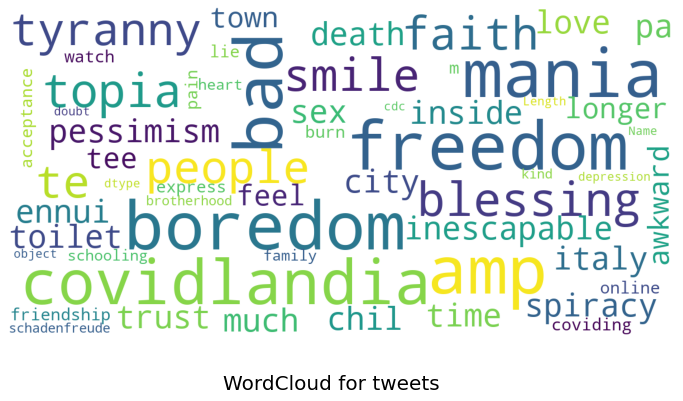

In [58]:
#chmura punktów, których używał użytkownik z największą ilością tweetów
show_wordcloud(firstUser['Lemma'], "WordCloud for tweets")

## Najpopularniejszy dzień

In [3]:
marzec = tweet2020[tweet2020.date == '2020-03-12']
marzec

,TweetID,Text,UserID,likeCount,lang,hastags,coordinates,place,date,time,CleanedText,Tokenize,POS_tagged,Lemma,Textblob_Polarity,Textblob_Analysis,Vader_Sentiment,Vader_Analysis,Afinn_Sentiment,Afinn_Analysis
1982708,1238253436627550208,Regardless on how you can catch this corona virus schools need to take the initiative to tell the kids about cautionary measures to take.... and schools not talking about it is a big problem...@NYCMayorsOffice,1231494354159722496,1,en,NaN,NaN,NaN,2020-03-12,23:59,regardless on how you can catch this corona virus schools need to take the initiative to tell the kids about cautionary measures to take and schools not talking about it is a big problem,"['regardless', 'on', 'how', 'you', 'can', 'catch', 'this', 'corona', 'virus', 'schools', 'need', 'to', 'take', 'the', 'initiative', 'to', 'tell', 'the', 'kids', 'about', 'cautionary', 'measures', 'to', 'take', 'and', 'schools', 'not', 'talking', 'about', 'it', 'is', 'a', 'big', 'problem']","[('regardless', 'r'), ('catch', 'v'), ('corona', 'n'), ('virus', 'n'), ('schools', 'n'), ('need', 'v'), ('take', 'v'), ('initiative', 'n'), ('tell', 'v'), ('kids', 'n'), ('cautionary', 'a'), ('measures', 'n'), ('take', 'v'), ('schools', 'n'), ('talking', 'v'), ('big', 'a'), ('problem', 'n')]",regardless catch corona virus school need take initiative tell kid cautionary measure take school talk big problem,0.000000,Neutral,-0.4019,Negative,-1.0,Negative
1982709,1238253434526224384,indo no reddit vender nude com a legenda pls help my vagina fight corona virus,1147953005817409536,0,en,NaN,NaN,NaN,2020-03-12,23:59,indo no reddit vender nude com a legenda pls help my vagina fight corona virus,"['indo', 'no', 'reddit', 'vender', 'nude', 'com', 'a', 'legenda', 'pls', 'help', 'my', 'vagina', 'fight', 'corona', 'virus']","[('indo', 'n'), ('reddit', 'n'), ('vender', 'n'), ('nude', 'a'), ('com', 'v'), ('legenda', 'n'), ('pls', 'n'), ('help', 'n'), ('vagina', 'a'), ('fight', 'n'), ('corona', 'n'), ('virus', 'n')]",indo reddit vender nude com legenda pls help vagina fight corona virus,0.000000,Neutral,0.1027,Positive,1.0,Positive
1982710,1238253432663879680,Corona virus killing people out here and dudes still don’t wash their hands after a nice pee.,1205947379675009025,1,en,NaN,NaN,NaN,2020-03-12,23:59,corona virus killing people out here and dudes still don’t wash their hands after a nice pee,"['corona', 'virus', 'killing', 'people', 'out', 'here', 'and', 'dudes', 'still', 'don’t', 'wash', 'their', 'hands', 'after', 'a', 'nice', 'pee']","[('corona', 'n'), ('virus', 'n'), ('killing', 'v'), ('people', 'n'), ('dudes', 'n'), ('still', 'r'), ('don’t', 'v'), ('wash', 'v'), ('hands', 'n'), ('nice', 'a'), ('pee', 'n')]",corona virus kill people dude still don’t wash hand nice pee,0.600000,Positive,0.0772,Positive,0.0,Neutral
1982711,1238253429417562113,The big question is:\nWhere and When did Arteta got infected with the corona virus? \n\nIs the Arsenal fc environment safe?? \n\nCan't there be a probability that Arteta is not the only victim of this virus in Arsenal?,1973029706,0,en,NaN,NaN,NaN,2020-03-12,23:59,the big question is where and when did arteta got infected with the corona virus is the arsenal fc environment safe can't there be a probability that arteta is not the only victim of this virus in arsenal,"['the', 'big', 'question', 'is', 'where', 'and', 'when', 'did', 'arteta', 'got', 'infected', 'with', 'the', 'corona', 'virus', 'is', 'the', 'arsenal', 'fc', 'environment', 'safe', ""can't"", 'there', 'be', 'a', 'probability', 'that', 'arteta', 'is', 'not', 'the', 'only', 'victim', 'of', 'this', 'virus', 'in', 'arsenal']","[('big', 'a'), ('question', 'n'), ('arteta', 'r'), ('got', 'v'), ('infected', 'v'), ('corona', 'n'), ('virus', 'n'), ('arsenal', 'a'), ('fc', 'n'), ('environment', 'n'), ('safe', 'a'), (""can't"", 'n'), ('probability', 'n'), ('arteta', 'n'), ('victim', 'n'), ('virus', 'n'), ('arsenal', 'a')]",big question arteta get infect corona virus arsenal fc environment 

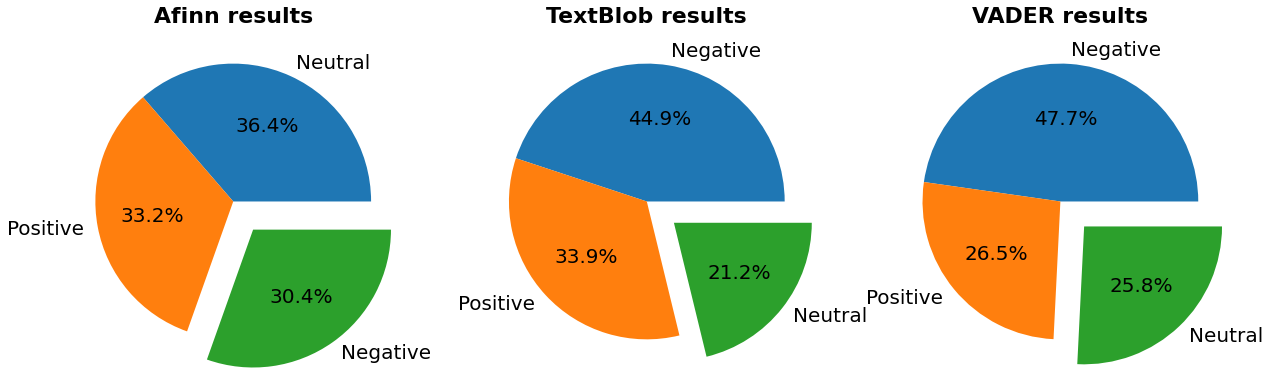

In [4]:
vader_counts = marzec.Vader_Analysis.value_counts()
afinn_counts = marzec.Afinn_Analysis.value_counts()
textblob_counts = marzec.Textblob_Analysis.value_counts()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(21,10))
plt.subplot(1,3,1)
plt.title("Afinn results", fontsize=22, fontweight="bold")
plt.pie(textblob_counts.values, labels = textblob_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.subplot(1,3,2)
plt.title("TextBlob results", fontsize=22, fontweight="bold")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.subplot(1,3,3)
plt.title("VADER results", fontsize=22, fontweight="bold")
plt.pie(afinn_counts.values, labels = afinn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.savefig("marzec12.pdf")